In [1]:
import math
import matplotlib.pyplot as plt
from scipy.stats import norm

## 0. Initialize variables

In [2]:
S_0 = 100
K = 90
r = 0
T = 1
N = 1
sigma = 0.3
step_sizes = list(range(50, 2001, 10))

## 1. Binomial Tree pricing

In [5]:
def binomial_tree_pricing(S_0, K, r, T, N, sigma, option_type):
    delta_t = T / N
    u = math.exp(math.sqrt(delta_t) * sigma)
    d = 1 / u
    p = (math.exp(r * T / N) - d) / (u - d)
    # calculate stock price at time T
    S_T = [S_0 * u**x * d**(N - x) for x in range(N+1)]
    # calculate payoff at time T
    f_T = [max(x - K, 0) for x in S_T] if option_type == "call" else [max(K - x, 0) for x in S_T]
    f_0 = 0
    
#     faster method but cannot handle large N
#     for x in range(len(f_T)):
#         f_0 += f_T[x] * math.comb(N, x) * p**x * (1 - p)**(N - x)
#    end of method

#   slower method but can handle large N
    for x in range(len(f_T)):
        temp = f_T[x]
        l1 = list(range(1, N + 1))
        l22 = list(range(1, x + 1))
        l2 = [1/i for i in l22]
        l33 = list(range(1, N - x + 1))
        l3 = [1/i for i in l33]
        l4 = [p] * x
        l5 = [(1 - p)] * (N - x)
        
        whole_list = l1 + l2 + l3 + l4 + l5
        while whole_list:
            if temp >= 1:
                temp *= whole_list.pop(len(whole_list) - 1)
            else:
                temp *= whole_list.pop(0)
        f_0 += temp
#    end of method

    # discount price
    f_0 *= math.exp(-r * T)
    return f_0

## 2. Black-Scholes-Merton option pricing

In [3]:
def BSM_pricing(S_0, K, r, T, sigma, option_type):
    d1 = (math.log(S_0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = (math.log(S_0 / K) + (r - 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    return S_0 * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2) if option_type == "call" else K * math.exp(-r*T) * norm.cdf(-d2) - S_0 * norm.cdf(-d1)

In [11]:

BSM_pricing(120, 80, 0, 1, 0.3, "call")

41.188715063856236

In [8]:
BSM_pricing(100, 90, 0, 1, 0.3, "call")

13.589108116054796

## 3a. Compare Put option prices

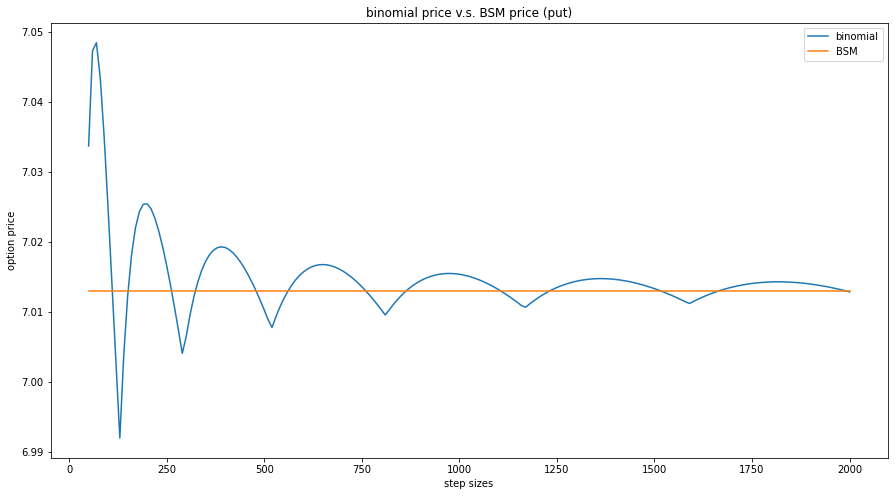

In [246]:
binomial_put_prices = [binomial_tree_pricing(S_0, K, r, T, x, sigma, "put") for x in step_sizes]
BSM_put_price = BSM_pricing(S_0, K, r, T, sigma, "put")
plt.figure(figsize=(15,8))
plt.plot(step_sizes, binomial_put_prices)
plt.plot(step_sizes, [BSM_put_price] * len(binomial_put_prices))
plt.ylabel("option price")
plt.xlabel("step sizes")
plt.title("binomial price v.s. BSM price (put)")
plt.legend(["binomial", "BSM"])

## 3b. Compare Call option prices

In [ ]:
binomial_call_prices = [binomial_tree_pricing(S_0, K, r, T, x, sigma, "call") for x in step_sizes]
BSM_call_price = BSM_pricing(S_0, K, r, T, sigma, "call")
plt.figure(figsize=(15,8))
plt.plot(step_sizes, binomial_call_prices)
plt.plot(step_sizes, [BSM_call_price] * len(binomial_call_prices))
plt.ylabel("option price")
plt.xlabel("step sizes")
plt.title("binomial price v.s. BSM price (call)")
plt.legend(["binomial", "BSM"])

## 4. Put-Call Parity

In [250]:
BSM_call_price - BSM_put_price

9.999999999999986

In [251]:
S_0 - K * math.exp(-r * T)

10.0

## 5. Binomial Tree price movement

In [1]:
step_sizes = list(range(50, 500))
binomial_call_prices = [binomial_tree_pricing(S_0, K, r, T, x, sigma, "call") for x in step_sizes]
BSM_call_price = BSM_pricing(S_0, K, r, T, sigma, "call")
plt.figure(figsize=(30,8))
plt.scatter(step_sizes, binomial_call_prices)
plt.plot(step_sizes, [BSM_call_price] * len(binomial_call_prices), color="#ff7f0e")
plt.ylabel("option price")
plt.xlabel("step sizes")
plt.title("binomial price v.s. BSM price (call)")
plt.legend(["binomial", "BSM"])

NameError: name 'binomial_tree_pricing' is not defined